<a href="https://www.kaggle.com/code/sjain600/calories-burned-ml-and-dnn-prediction?scriptVersionId=234579166" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

pd.set_option('display.max_columns', 200)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8')
# Set Matplotlib defaults
plt.rc('figure', figsize=(8,8), dpi=200)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)
plt.rc('animation', html='html5')
plt.tight_layout()

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


<Figure size 1600x1600 with 0 Axes>

In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

# Data Understanding

In [3]:
df.shape

(973, 15)

In [4]:
df.sample(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
691   57    Male         76.6        1.86      173      141           55   
412   33    Male         81.8        1.99      184      137           51   
737   34    Male        115.3        1.81      181      167           67   
842   39    Male         81.7        1.75      165      165           55   
226   56    Male        107.8        1.73      185      126           50   
14    20    Male        117.7        1.81      196      161           54   
598   38    Male         46.9        1.74      198      167           64   
553   59  Female         70.7        1.68      192      121           66   
874   43  Female         40.5        1.74      187      143           51   
453   52    Male         50.3        1.78      170      132           67   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
691                      1.14            796.0         Yoga            25.4   
412                      1.59           1198.0     Strength            10.5   
737                      1.36           1249.0         Yoga            24.5   
842                      1.32           1198.0       Cardio            29.1   
226                      1.09            680.0         Yoga            26.6   
14                       1.35           1195.0         Yoga            26.4   
598                      1.03            946.0     Strength            20.0   
553                      1.17            637.0       Cardio            34.9   
874                      1.50            965.0         HIIT            32.9   
453                      0.85            555.0         HIIT            24.5   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
691                    2.8                              4                 2   
412                    3.5                              4                 3   
737                    2.2                              2                 1   
842                    2.8                              4                 2   
226                    2.8                              3                 2   
14                     3.3                              3                 2   
598                    2.6                              4                 2   
553                    1.9                              3                 2   
874                    2.2                              3                 2   
453                    2.3                              2                 1   

       BMI  
691  22.14  
412  20.66  
737  35.19  
842  26.68  
226  36.02  
14   35.93  
598  15.49  
553  25.05  
874  13.38  
453  15.88

In [5]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Data Preparation

## Rename the columns

In [8]:
df = df.rename(columns={'Weight (kg)': 'Weight', 
                  'Height (m)': 'Height',
                  'Session_Duration (hours)': 'Session_Duration',
                  'Water_Intake (liters)': 'Water_Intake',
                  'Workout_Frequency (days/week)': 'Workout_Frequency'})

Doubling checking the columns to see whether rename has applied to the df

In [9]:
df.head(3)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male    88.3    1.71      180      157           60   
1   46  Female    74.9    1.53      179      151           66   
2   32  Female    68.1    1.66      167      122           54   

   Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0              1.69           1313.0         Yoga            12.6   
1              1.30            883.0         HIIT            33.9   
2              1.11            677.0       Cardio            33.4   

   Water_Intake  Workout_Frequency  Experience_Level    BMI  
0           3.5                  4                 3  30.20  
1           2.1                  4                 2  32.00  
2           2.3                  4                 2  24.71

# Feature Understanding via Data Visualization

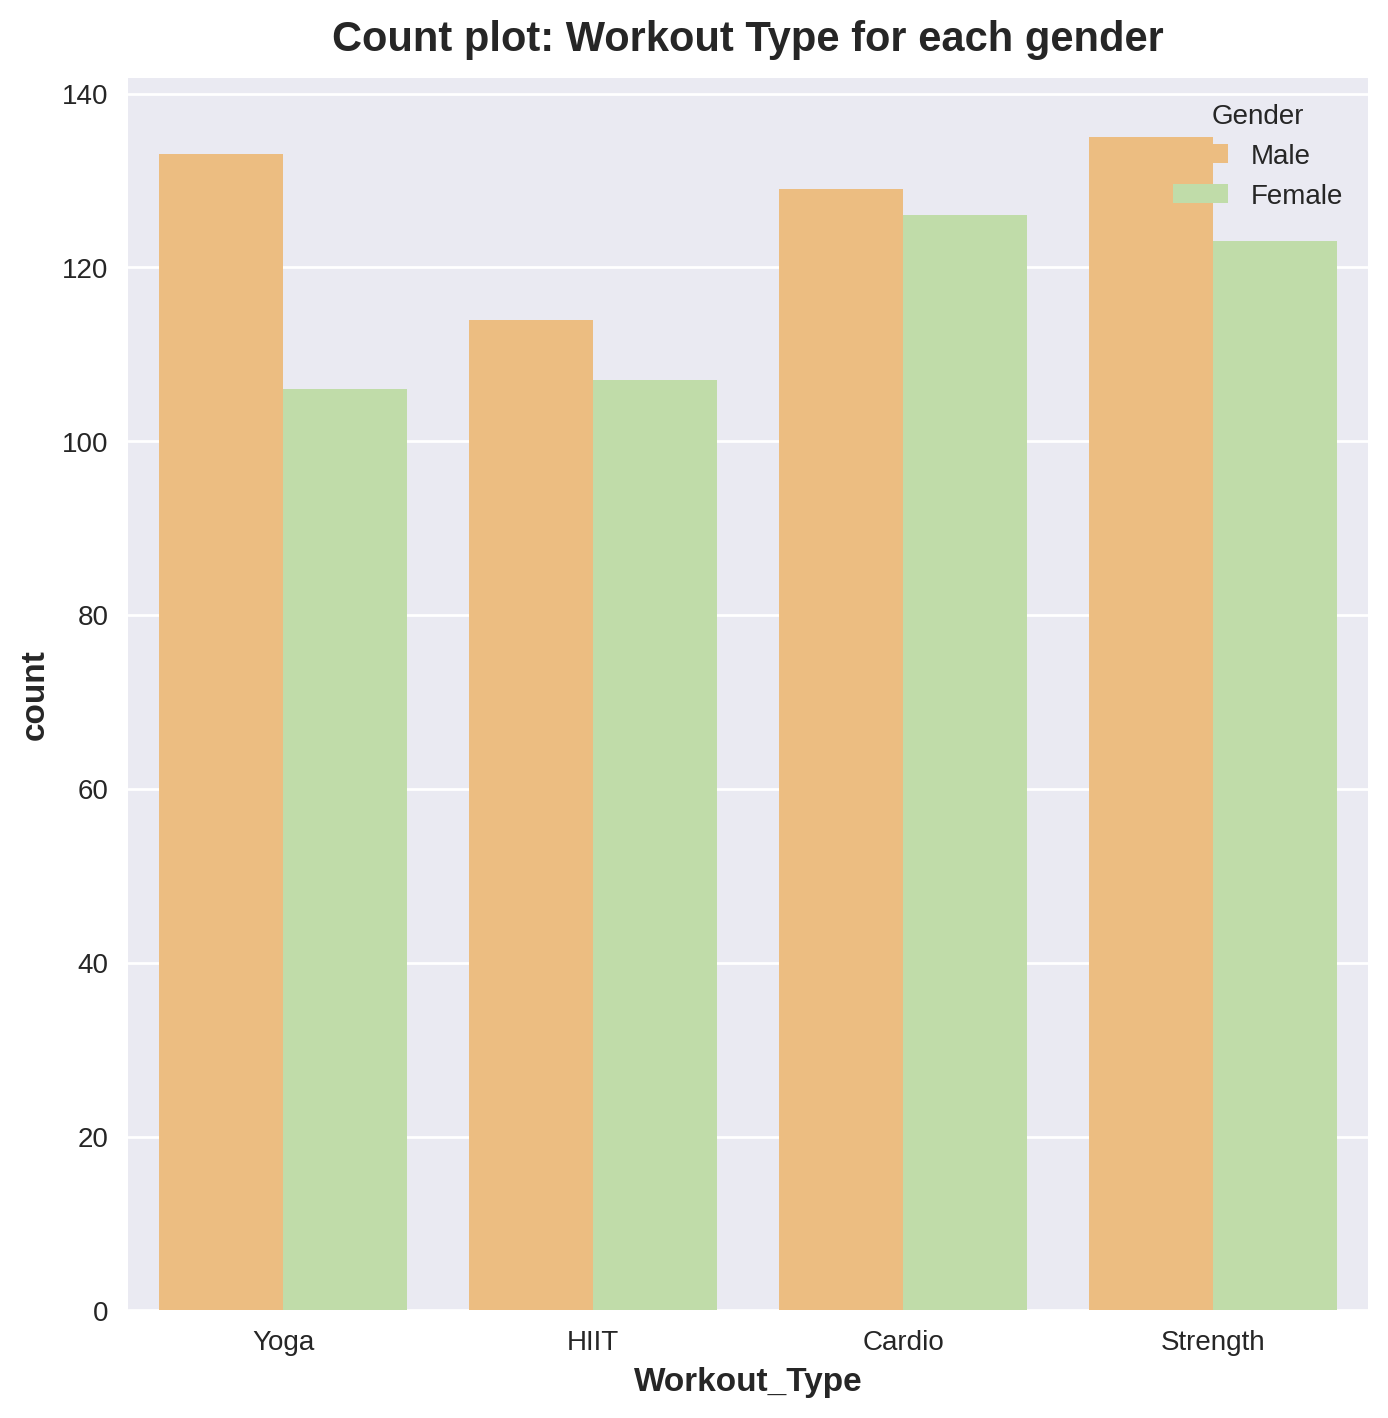

In [10]:
sns.countplot(x='Workout_Type', hue='Gender', palette='Spectral', data=df)
plt.title('Count plot: Workout Type for each gender')
plt.show()

Text(0.5, 1.0, 'Barplot: Workout Type influence on Calories Burned')

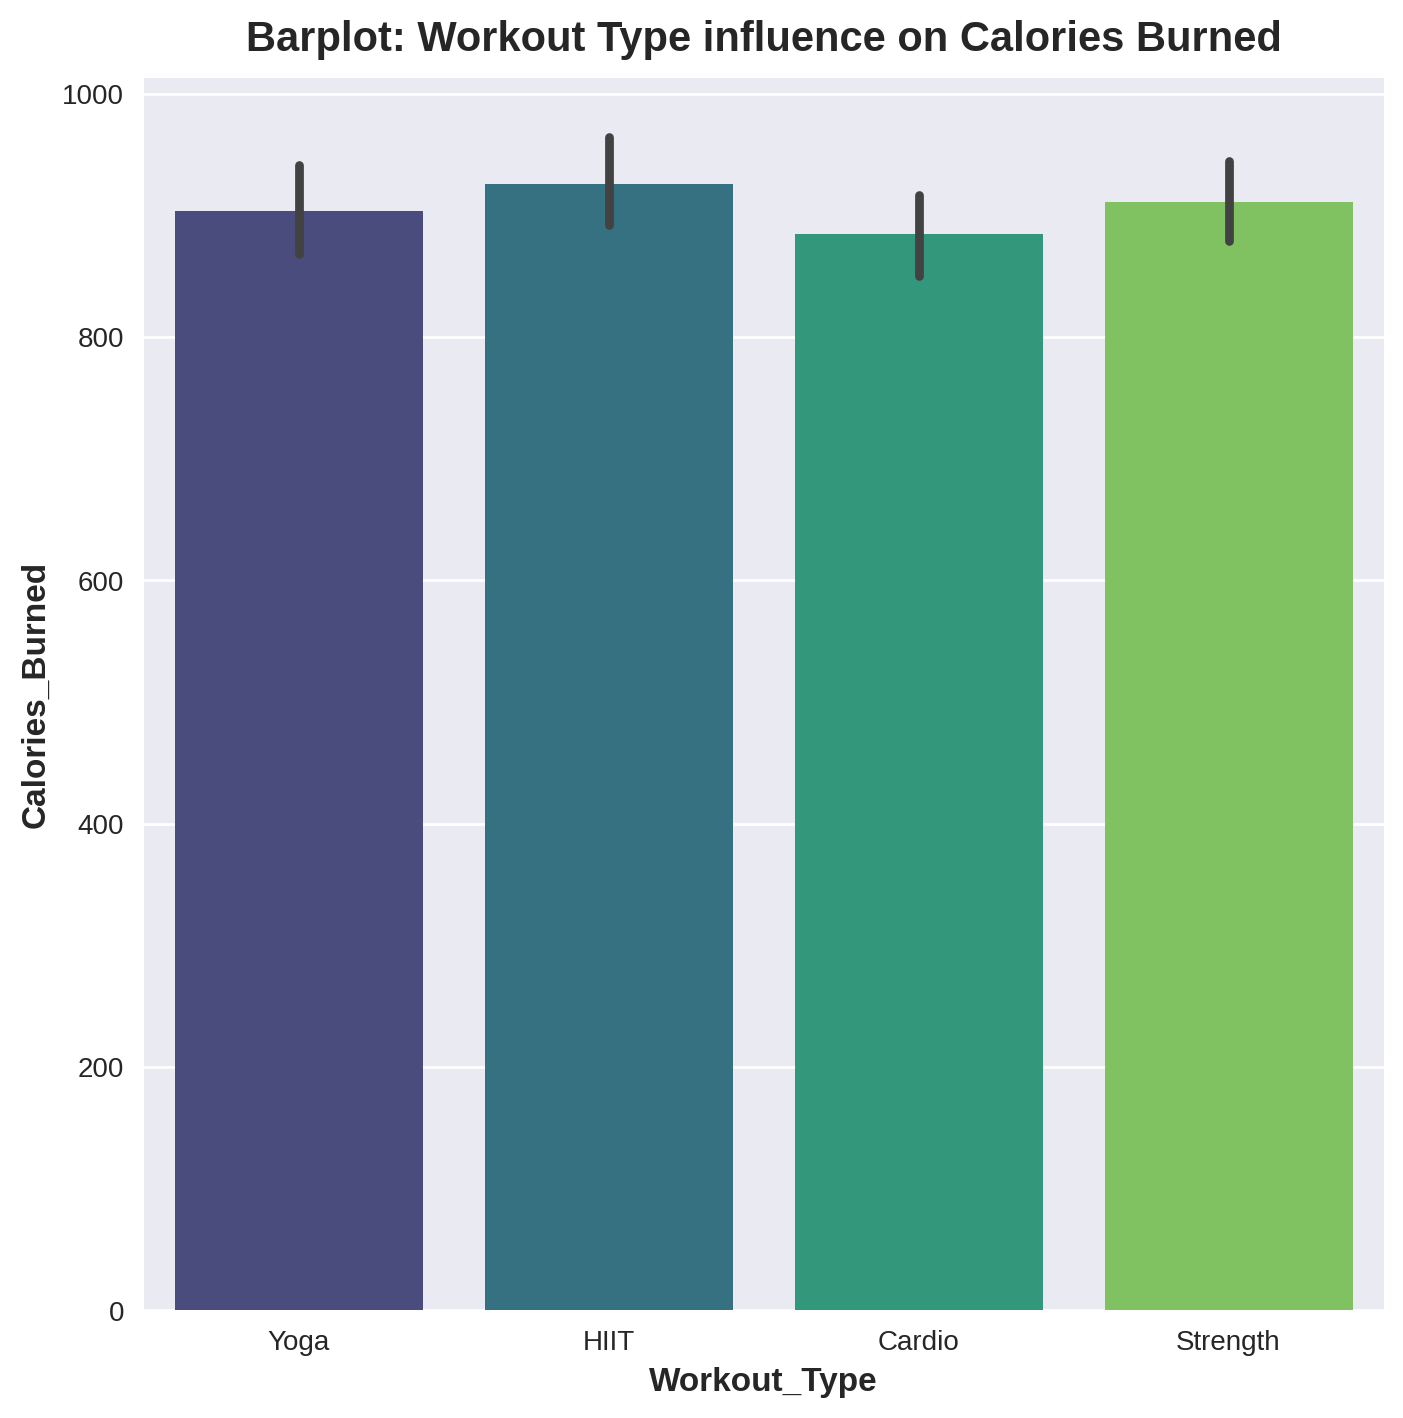

In [11]:
sns.barplot(x='Workout_Type', y='Calories_Burned', palette='viridis', data=df)
plt.title('Barplot: Workout Type influence on Calories Burned')

## Scatterplot

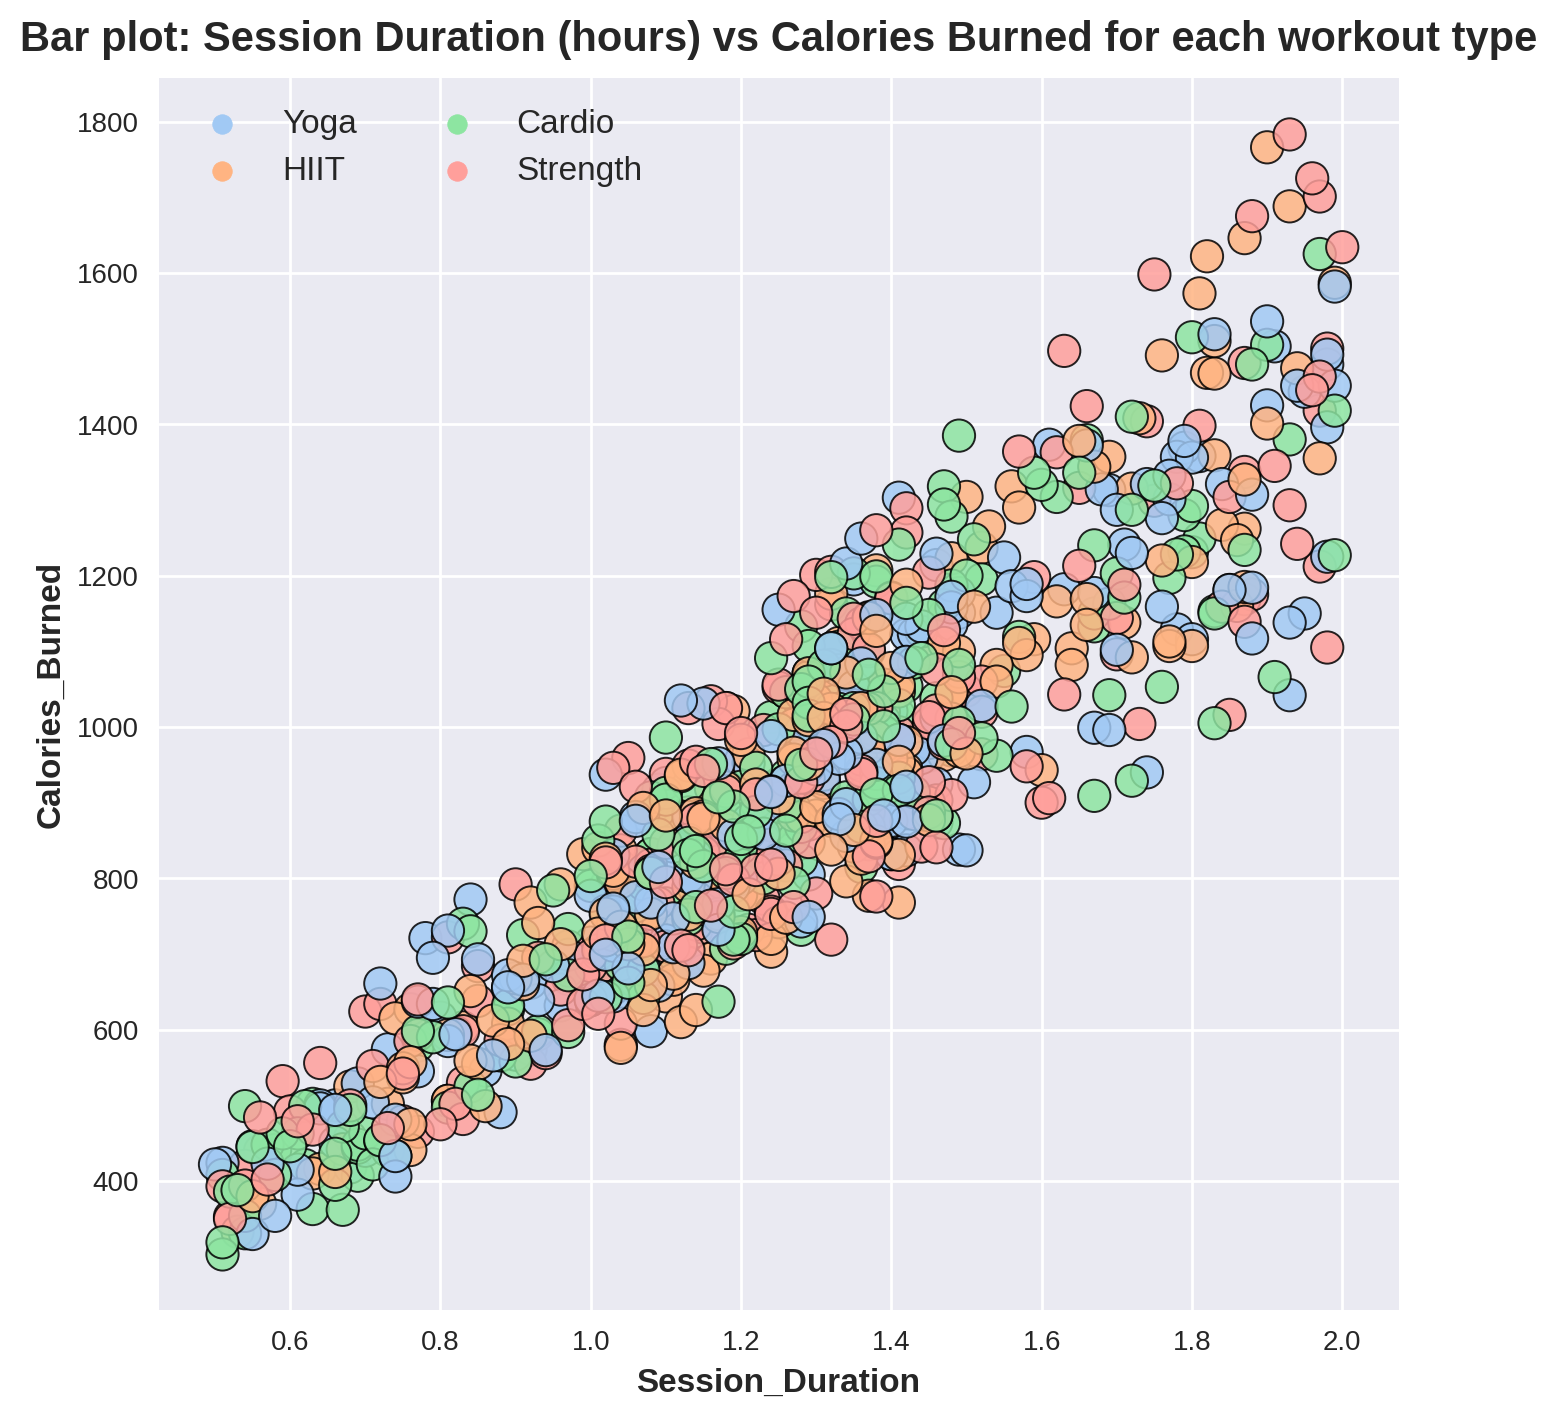

In [12]:
sns.scatterplot(x='Session_Duration', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='pastel', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Session Duration (hours) vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

The inferences we can make from the scatterplot is that there is a positive relationship between session duration and calories burned. The longer your session duration of the workout regardless of workout type, the more calories you burn.

In [13]:
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='hls', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Scatter plot: Fat Percentage vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

From the scatterplot above, we can deduce that there is a negative relationship between fat percentage and calories burned.

In [14]:
bin_edges = np.linspace(1.5, 3.7, num=4)

df['Water_Intake'] = pd.cut(df['Water_Intake'], bins=bin_edges, include_lowest=True, labels=False)

In [15]:
df.sample(10)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
535   59    Male    78.0    1.92      180      127           53   
947   25  Female    62.6    1.65      174      142           61   
567   42    Male    63.3    1.77      183      134           59   
593   55    Male   129.9    1.73      187      155           60   
508   34    Male    65.9    1.62      199      164           56   
94    22    Male   102.6    1.84      163      153           65   
621   29    Male    87.0    1.86      177      123           72   
178   56  Female    52.9    1.64      169      155           53   
599   28  Female    71.3    1.67      192      140           63   
419   47    Male    86.6    1.99      182      153           70   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
535              0.72            453.0       Cardio            28.1   
947              1.20            852.0       Cardio            27.9   
567              1.32            876.0         HIIT            25.7   
593              0.69            529.0         Yoga            21.7   
508              0.81            731.0         Yoga            28.8   
94               1.25           1052.0     Strength            20.5   
621              1.52           1028.0         Yoga            11.0   
178              1.10            767.0       Cardio            27.4   
599              1.46           1022.0     Strength            28.1   
419              1.98           1500.0     Strength            10.6   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
535             1                  3                 1  21.16  
947             0                  3                 1  22.99  
567             2                  3                 2  20.20  
593             2                  3                 1  43.40  
508             0                  2                 1  25.11  
94              1                  3                 2  30.30  
621             2                  4                 3  25.15  
178             1                  3                 2  19.67  
599             0                  4                 2  25.57  
419             2                  4                 3  21.87

## Lmplot - Capturing Interaction effects

Text(0.5, 1.0, 'Interaction of Session and Water intake (litres) on calories burned')

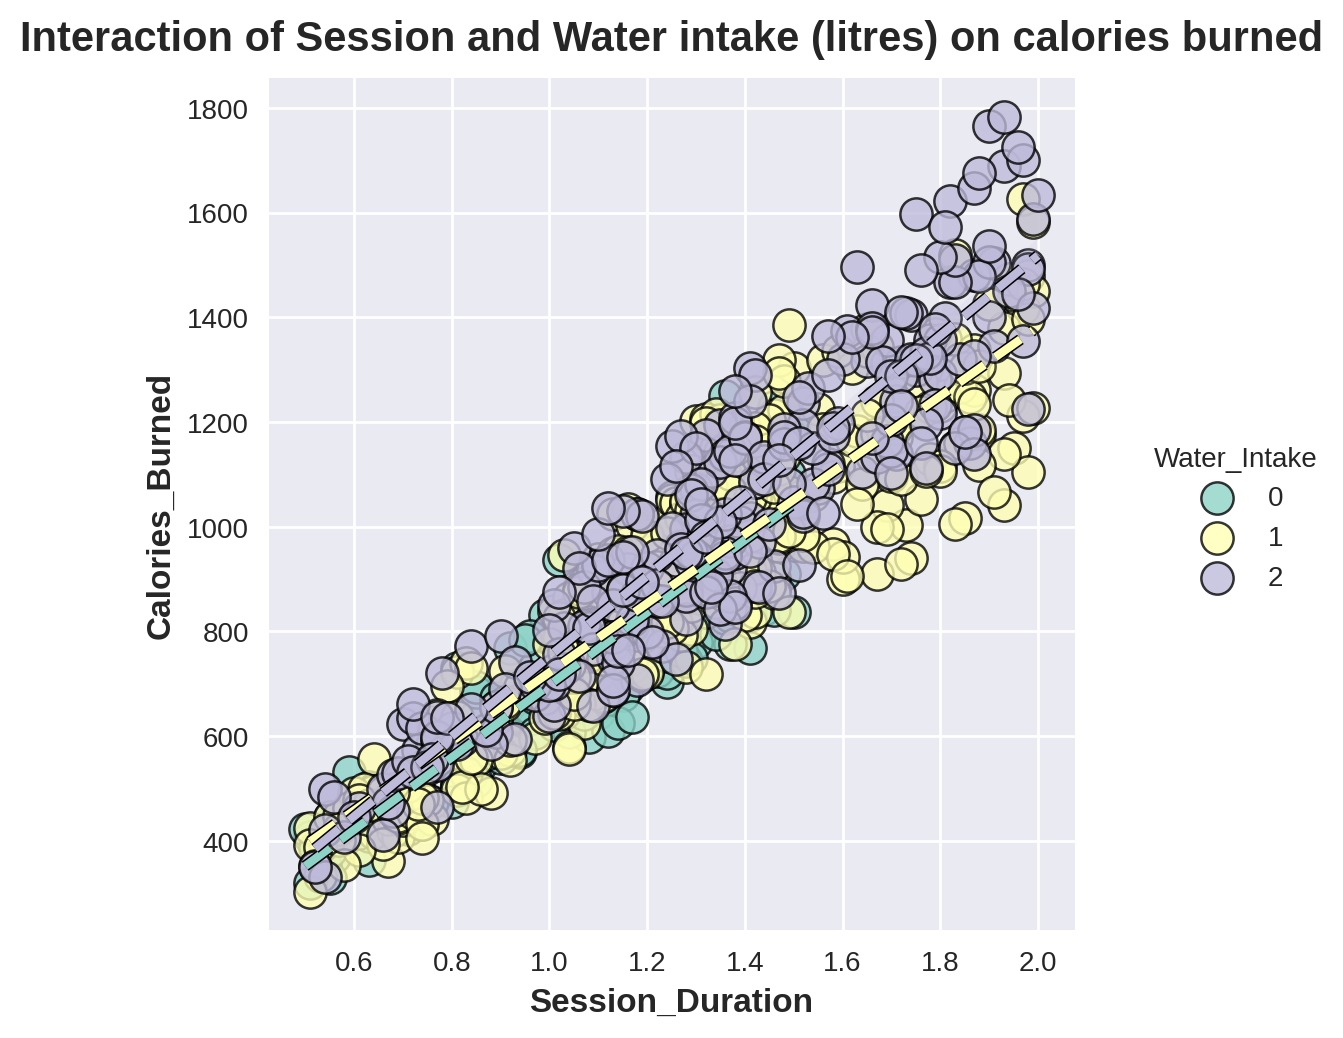

In [16]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Water_Intake',
palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.9, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and Water intake (litres) on calories burned")

The inferences we can make from this lmplot is that the longer we can workout, the more water we intake while burning calories. We can notice that regression of water intake of 2 (interval between 2.96667 and 3.7 litres) is steeper than other intervals.

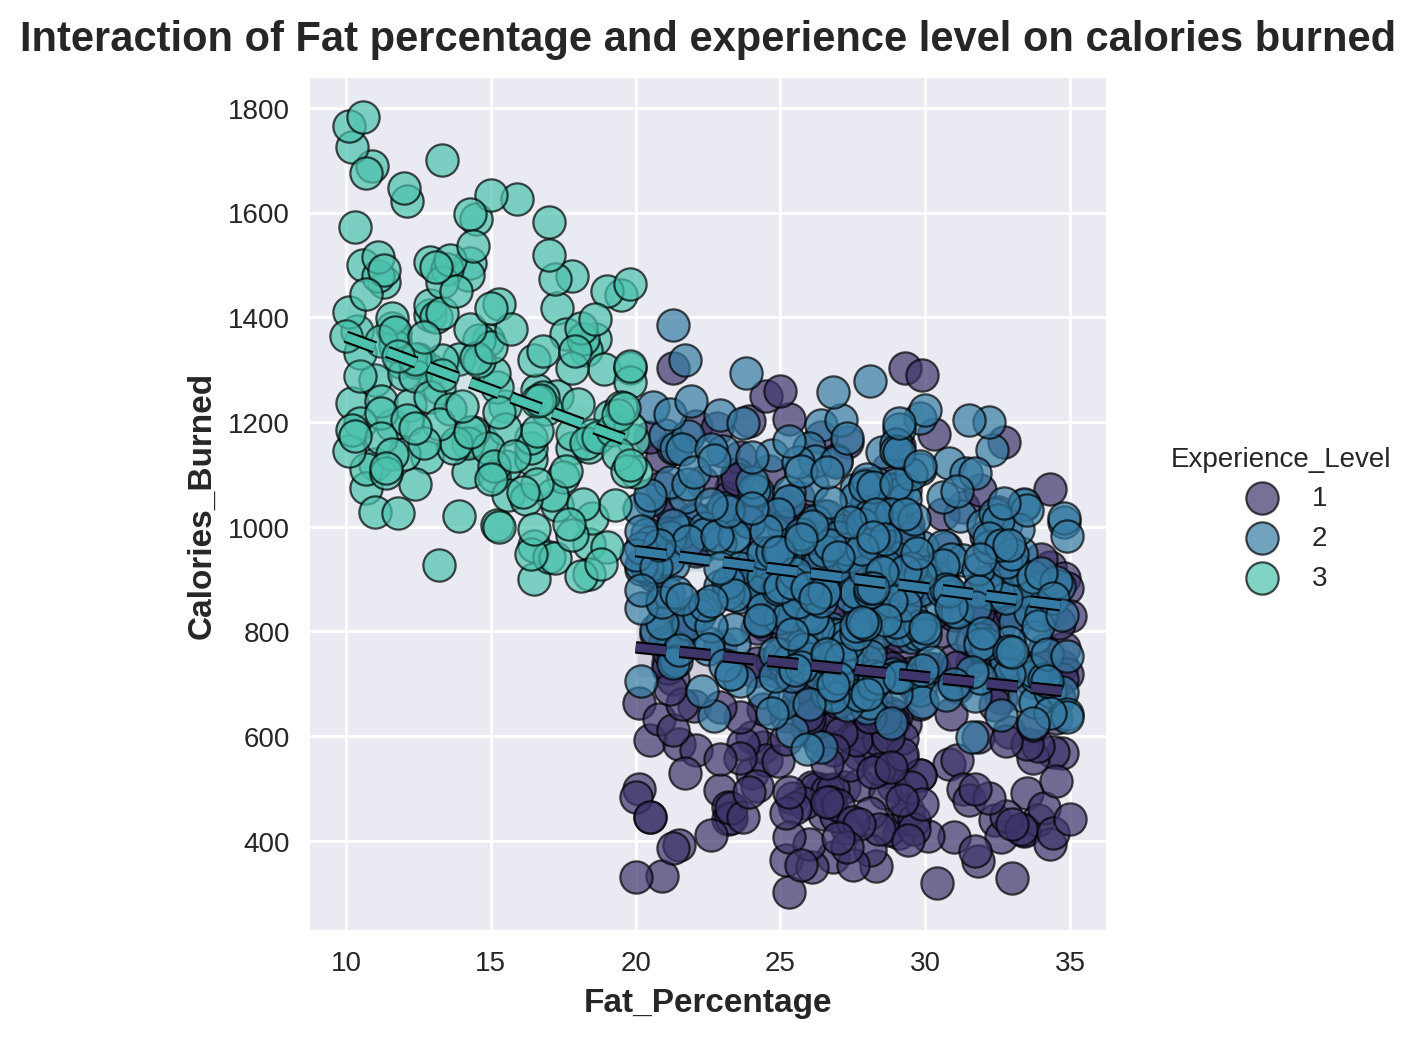

In [17]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Experience_Level', palette='mako', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.7},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.5, foreground='black')]})
plt.title("Interaction of Fat percentage and experience level on calories burned")
plt.show()

As we can see from lmplot that people with more experience level, burn more calories. Since the regression line for experience level of 3 years has a steeper line as compare to other experience levels. Though lines of experience of 1 and 2 years are parallel to each other, but the line of 2 years is higher than line of 1 year. Thus, proving my inferences correct.

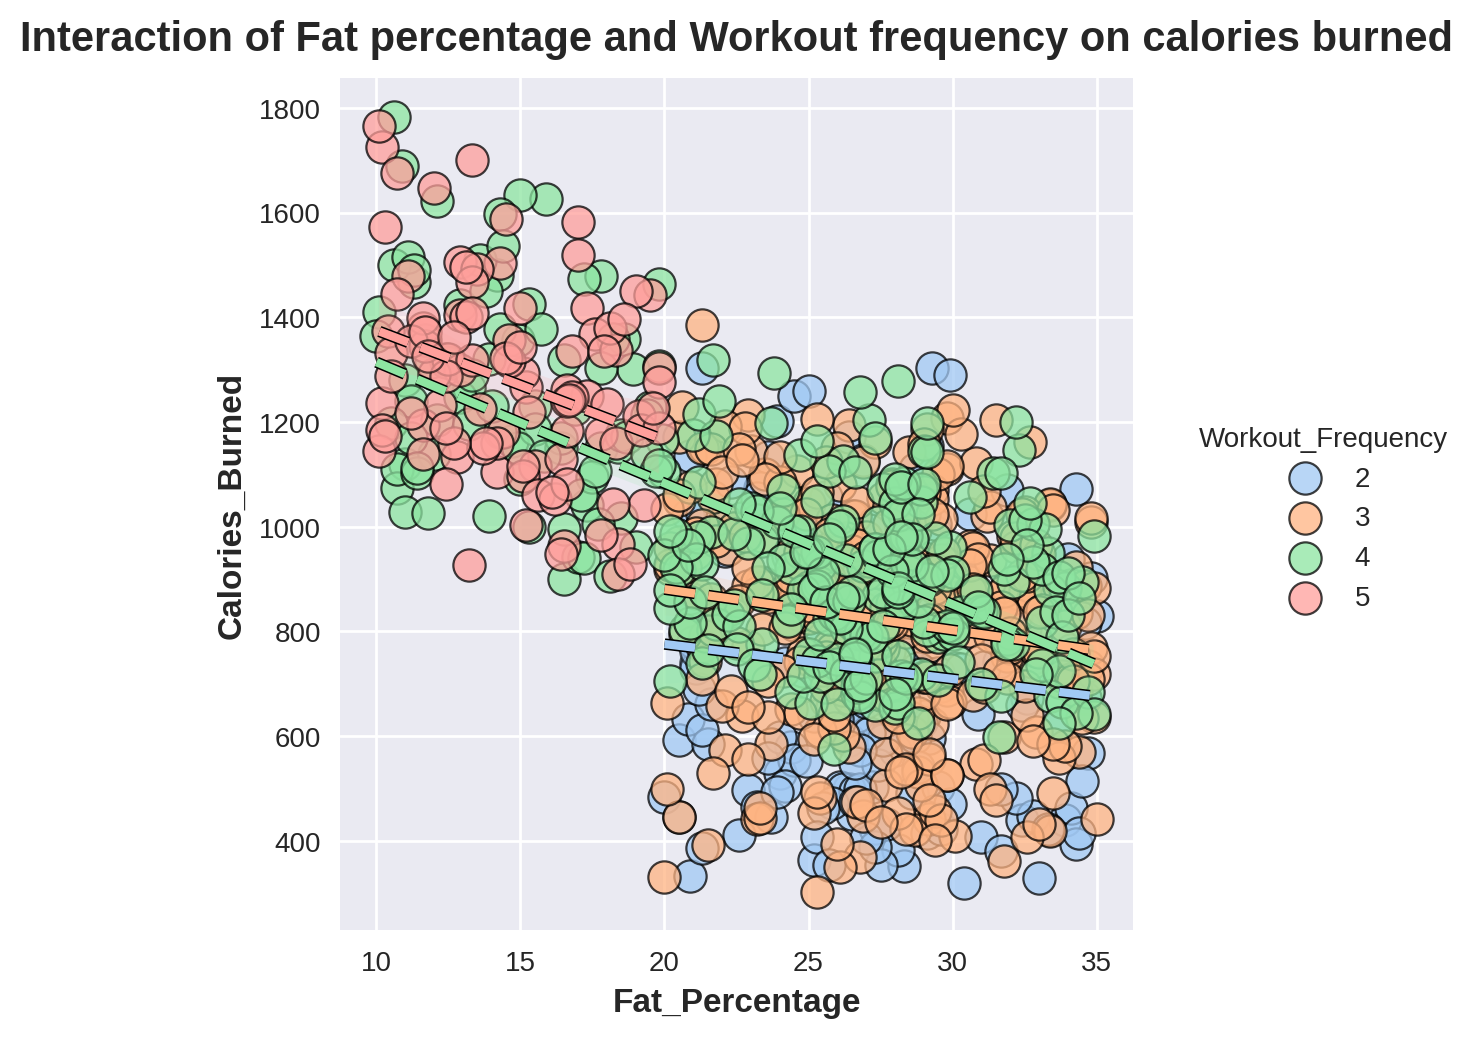

In [18]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Workout_Frequency', palette='pastel', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.75},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Fat percentage and Workout frequency on calories burned")
plt.show()

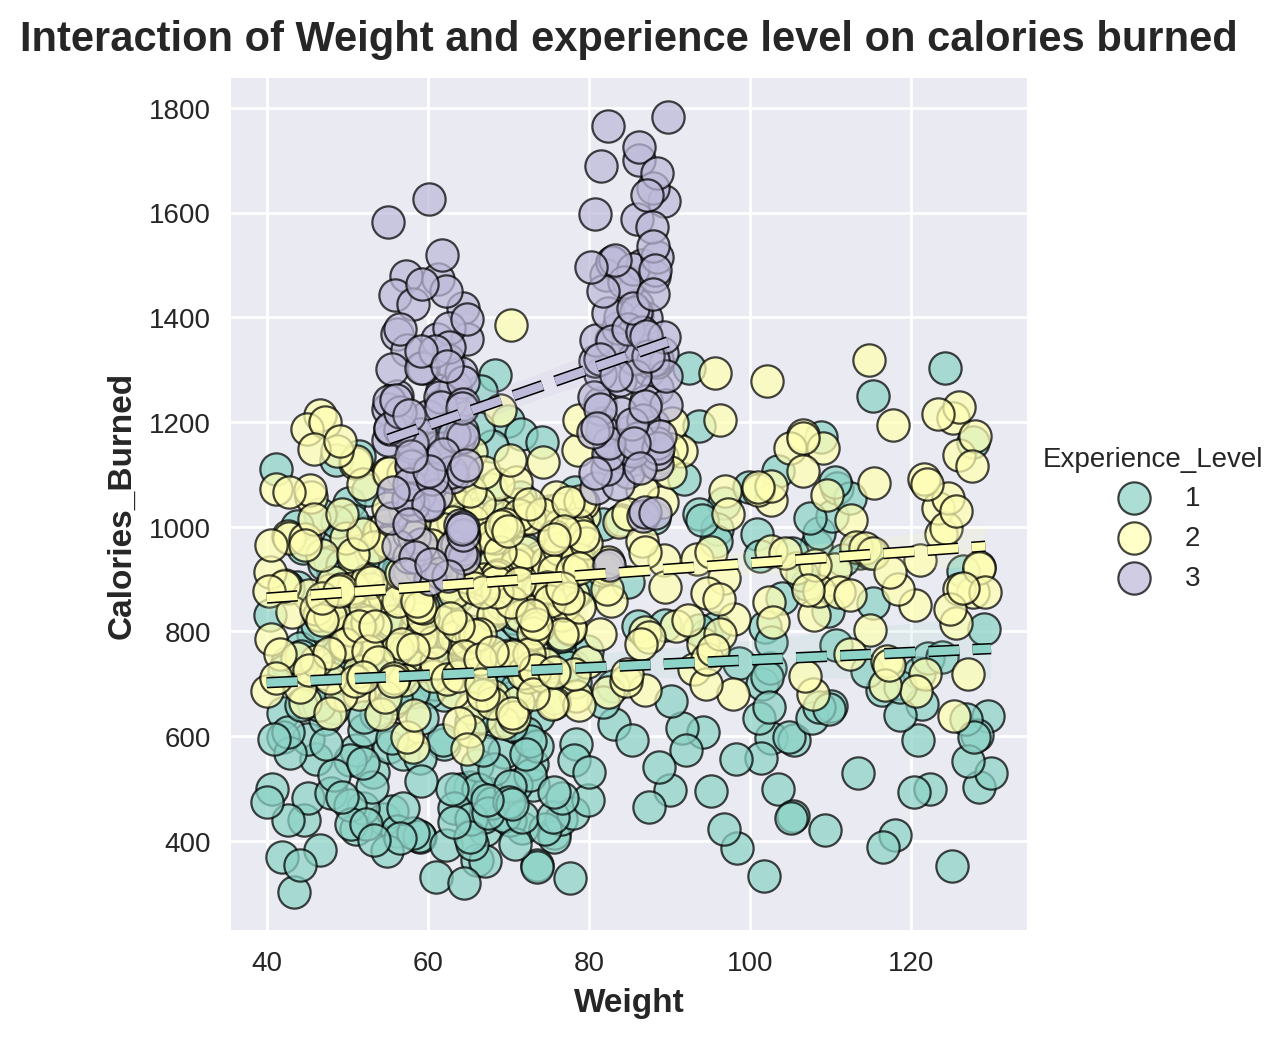

In [19]:
sns.lmplot(x='Weight', y='Calories_Burned', hue='Experience_Level', palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.73},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Weight and experience level on calories burned")
plt.show()

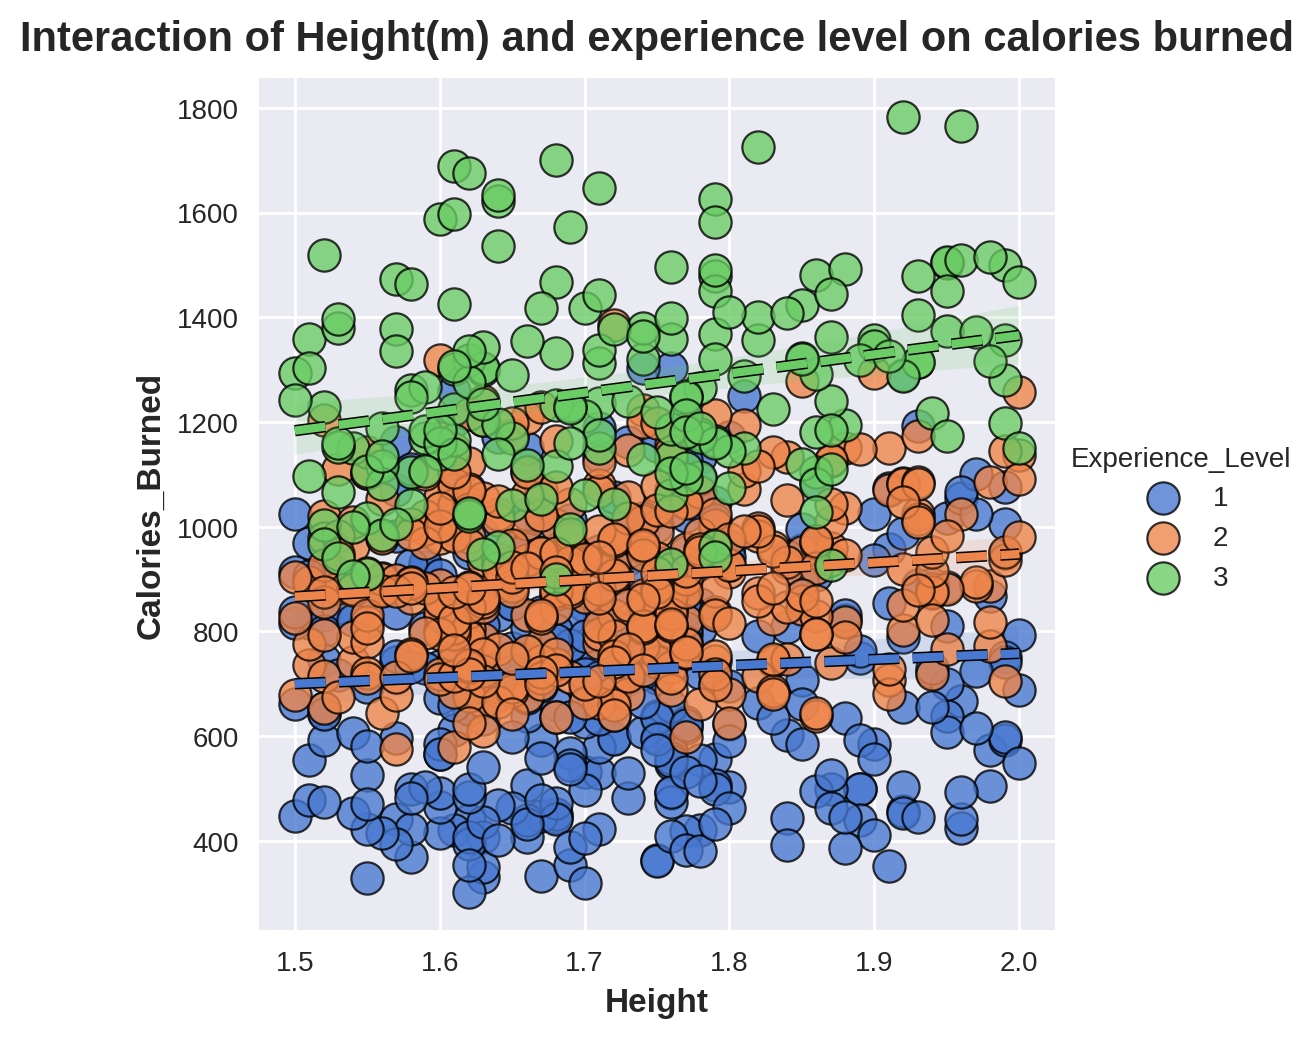

In [20]:
sns.lmplot(x='Height', y='Calories_Burned', hue='Experience_Level', palette='muted', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Height(m) and experience level on calories burned")
plt.show()

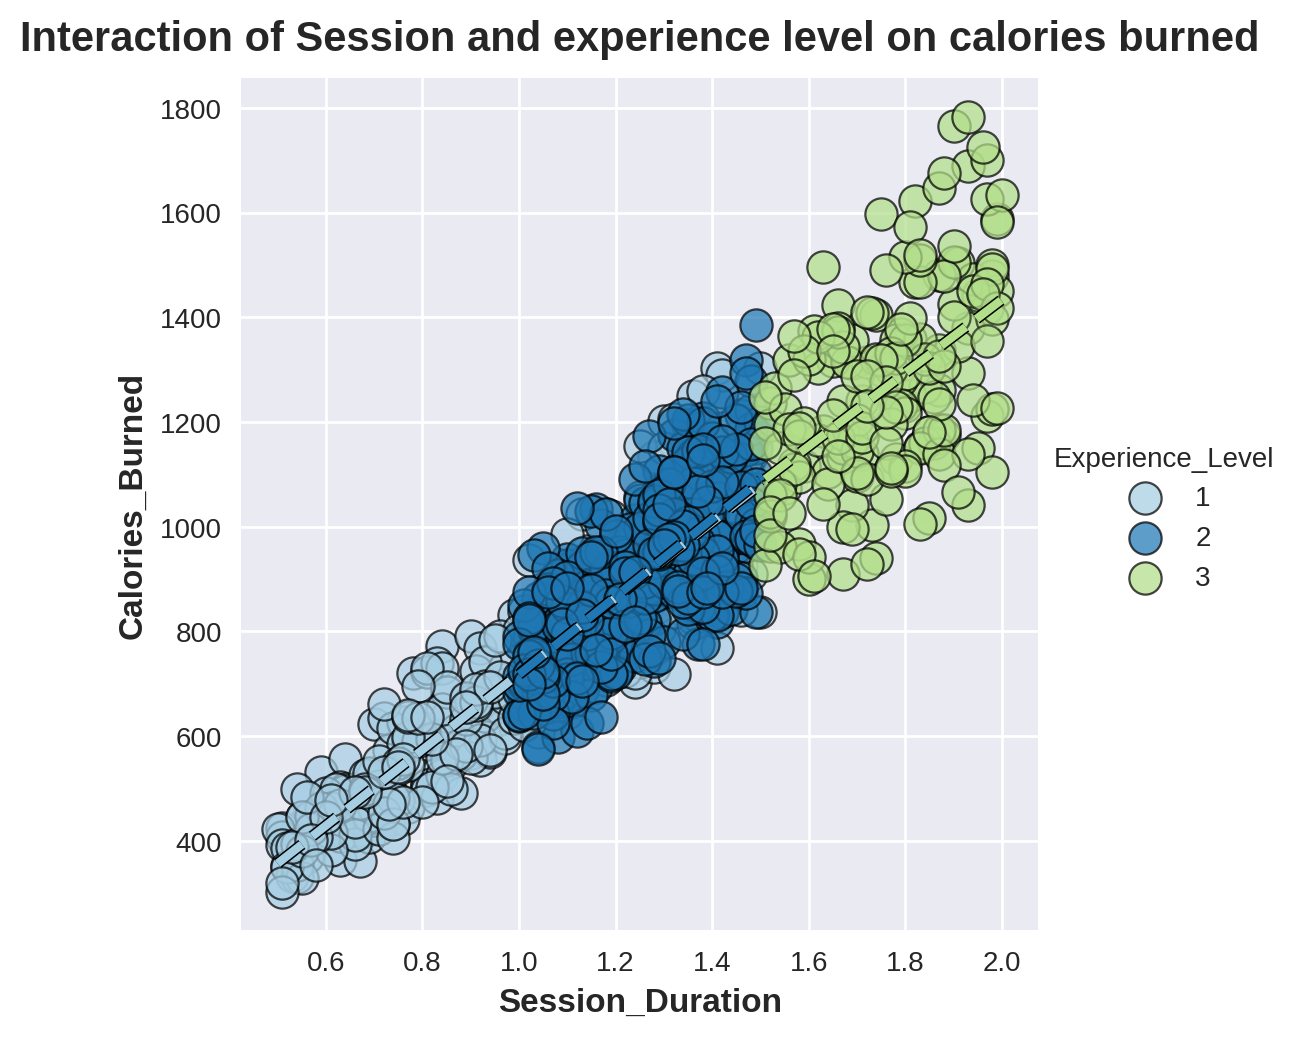

In [21]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Experience_Level', palette='Paired', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.72},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and experience level on calories burned")
plt.show()

Since the lines are overlapping, there is no category effect of experience level on the relationship between session duration and calories burned. Therefore, the relationship between session duration and calories burned is consistent across all workout types.

# Feature engineering

In [22]:
features = ['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration','Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI']

In [23]:
def add_features(df):
    for i, col1 in enumerate(features):
        for col2 in (features[i+1:]):
            new_col = f'{col1}_{col2}'
            df[new_col] = df[col1] * df[col2]
    return df

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Workout_Type'] = le.fit_transform(df['Workout_Type'])


In [25]:
epsilon = 1e-6
#df['BMI_experience'] = df['BMI'] * df['Experience_Level']
#df['Weight_experience'] = df['Weight'] * df['Experience_Level']
#df['Height_experience'] = df['Height'] * df['Experience_Level']
#df['fat_experience'] = df['Fat_Percentage'] * df['Experience_Level']
df['experience_fat_ratio'] = df['Experience_Level'] / (df['Fat_Percentage'] + epsilon)
#df['session_water'] = df['Session_Duration'] * df['Water_Intake']
df['bpm_ratio'] = df['Avg_BPM'] / (df['Max_BPM'] + epsilon)


In [26]:
df.sample(5)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
2     32       0    68.1    1.66      167      122           54   
272   33       0    45.9    1.50      189      144           62   
930   58       0    59.3    1.58      166      165           56   
964   56       0    64.2    1.69      190      137           61   
865   21       1   101.2    1.84      181      132           50   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
2                1.11            677.0             0            33.4   
272              0.92            662.0             3            29.8   
930              1.97           1463.0             2            19.8   
964              1.99           1227.0             0            19.6   
865              1.30            944.0             3            24.3   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
2               1                  4                 2  24.71   
272             0                  3                 1  20.40   
930             1                  4                 3  23.75   
964             1                  5                 3  22.48   
865             2                  2                 1  29.89   

     experience_fat_ratio  bpm_ratio  
2                0.059880   0.730539  
272              0.033557   0.761905  
930              0.151515   0.993976  
964              0.153061   0.721053  
865              0.041152   0.729282

# Model prediction

## Splitting the data into train and valid sets

In [27]:
from sklearn.model_selection import train_test_split, KFold

X = df.copy()
y = X.pop('Calories_Burned')
X = add_features(X)
y = np.log(y)

kf = KFold(n_splits=7, shuffle=True, random_state=10)

for train_index, valid_index in kf.split(X, y):
    X_train, X_valid = X.loc[train_index], X.loc[valid_index]
    y_train, y_valid = y.loc[train_index], y.loc[valid_index]

#X_train = add_features(X_train)
#X_valid = add_features(X_valid)


## Using Standard Encoders to preprocess the train and valid sets

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=200, random_state=10)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_valid)
rfr_fit = rfr.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, rfr_fit)):,.5f}')
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, rfr_pred)):,.5f}\n')
print(f'Train R2Score: {(r2_score(y_train, rfr_fit)):,.5f}')
print(f'Valid R2Score: {(r2_score(y_valid, rfr_pred)):,.5f}')

Train RMSE: 0.01128
Valid RMSE: 0.02822

Train R2Score: 0.99880
Valid R2Score: 0.99164


## XGBRegressor Model

In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=250,
    random_state=10,
    learning_rate=0.07,
    eval_metric='rmse'
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_valid)
xgb_fit = xgb.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, xgb_fit)):,.5f}\n')
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, xgb_pred)):,.5f}\n')
print(f'Train R2Score: {(r2_score(y_train, xgb_fit)):,.5f}')
print(f'Valid R2Score: {(r2_score(y_valid, xgb_pred)):,.5f}')

Train RMSE: 0.00075

Valid RMSE: 0.01592

Train R2Score: 0.99999
Valid R2Score: 0.99734


Train RMSE: 0.00329

Valid RMSE: 0.01586

Valid R2Score: 0.99990
Valid R2Score: 0.99736

In [31]:
X_train[:]

array([[ 0.80952381,  0.        ,  0.65526553, ...,  1.2       ,
         0.94680249,  1.42848829],
       [ 0.33333333, -1.        ,  0.17281728, ...,  0.4       ,
         1.10979061,  0.65444493],
       [-0.33333333, -1.        , -0.0720072 , ...,  0.4       ,
         0.44968874,  0.23017605],
       ...,
       [ 0.95238095, -1.        , -0.34923492, ...,  1.8       ,
         0.41935484,  0.49439837],
       [-0.33333333,  0.        ,  2.0270027 , ...,  0.        ,
         0.77521222,  0.98850575],
       [ 0.33333333,  0.        ,  0.66966697, ..., -0.8       ,
        -0.27651387, -0.23657791]])

## Feature importance

<function matplotlib.pyplot.show(close=None, block=None)>

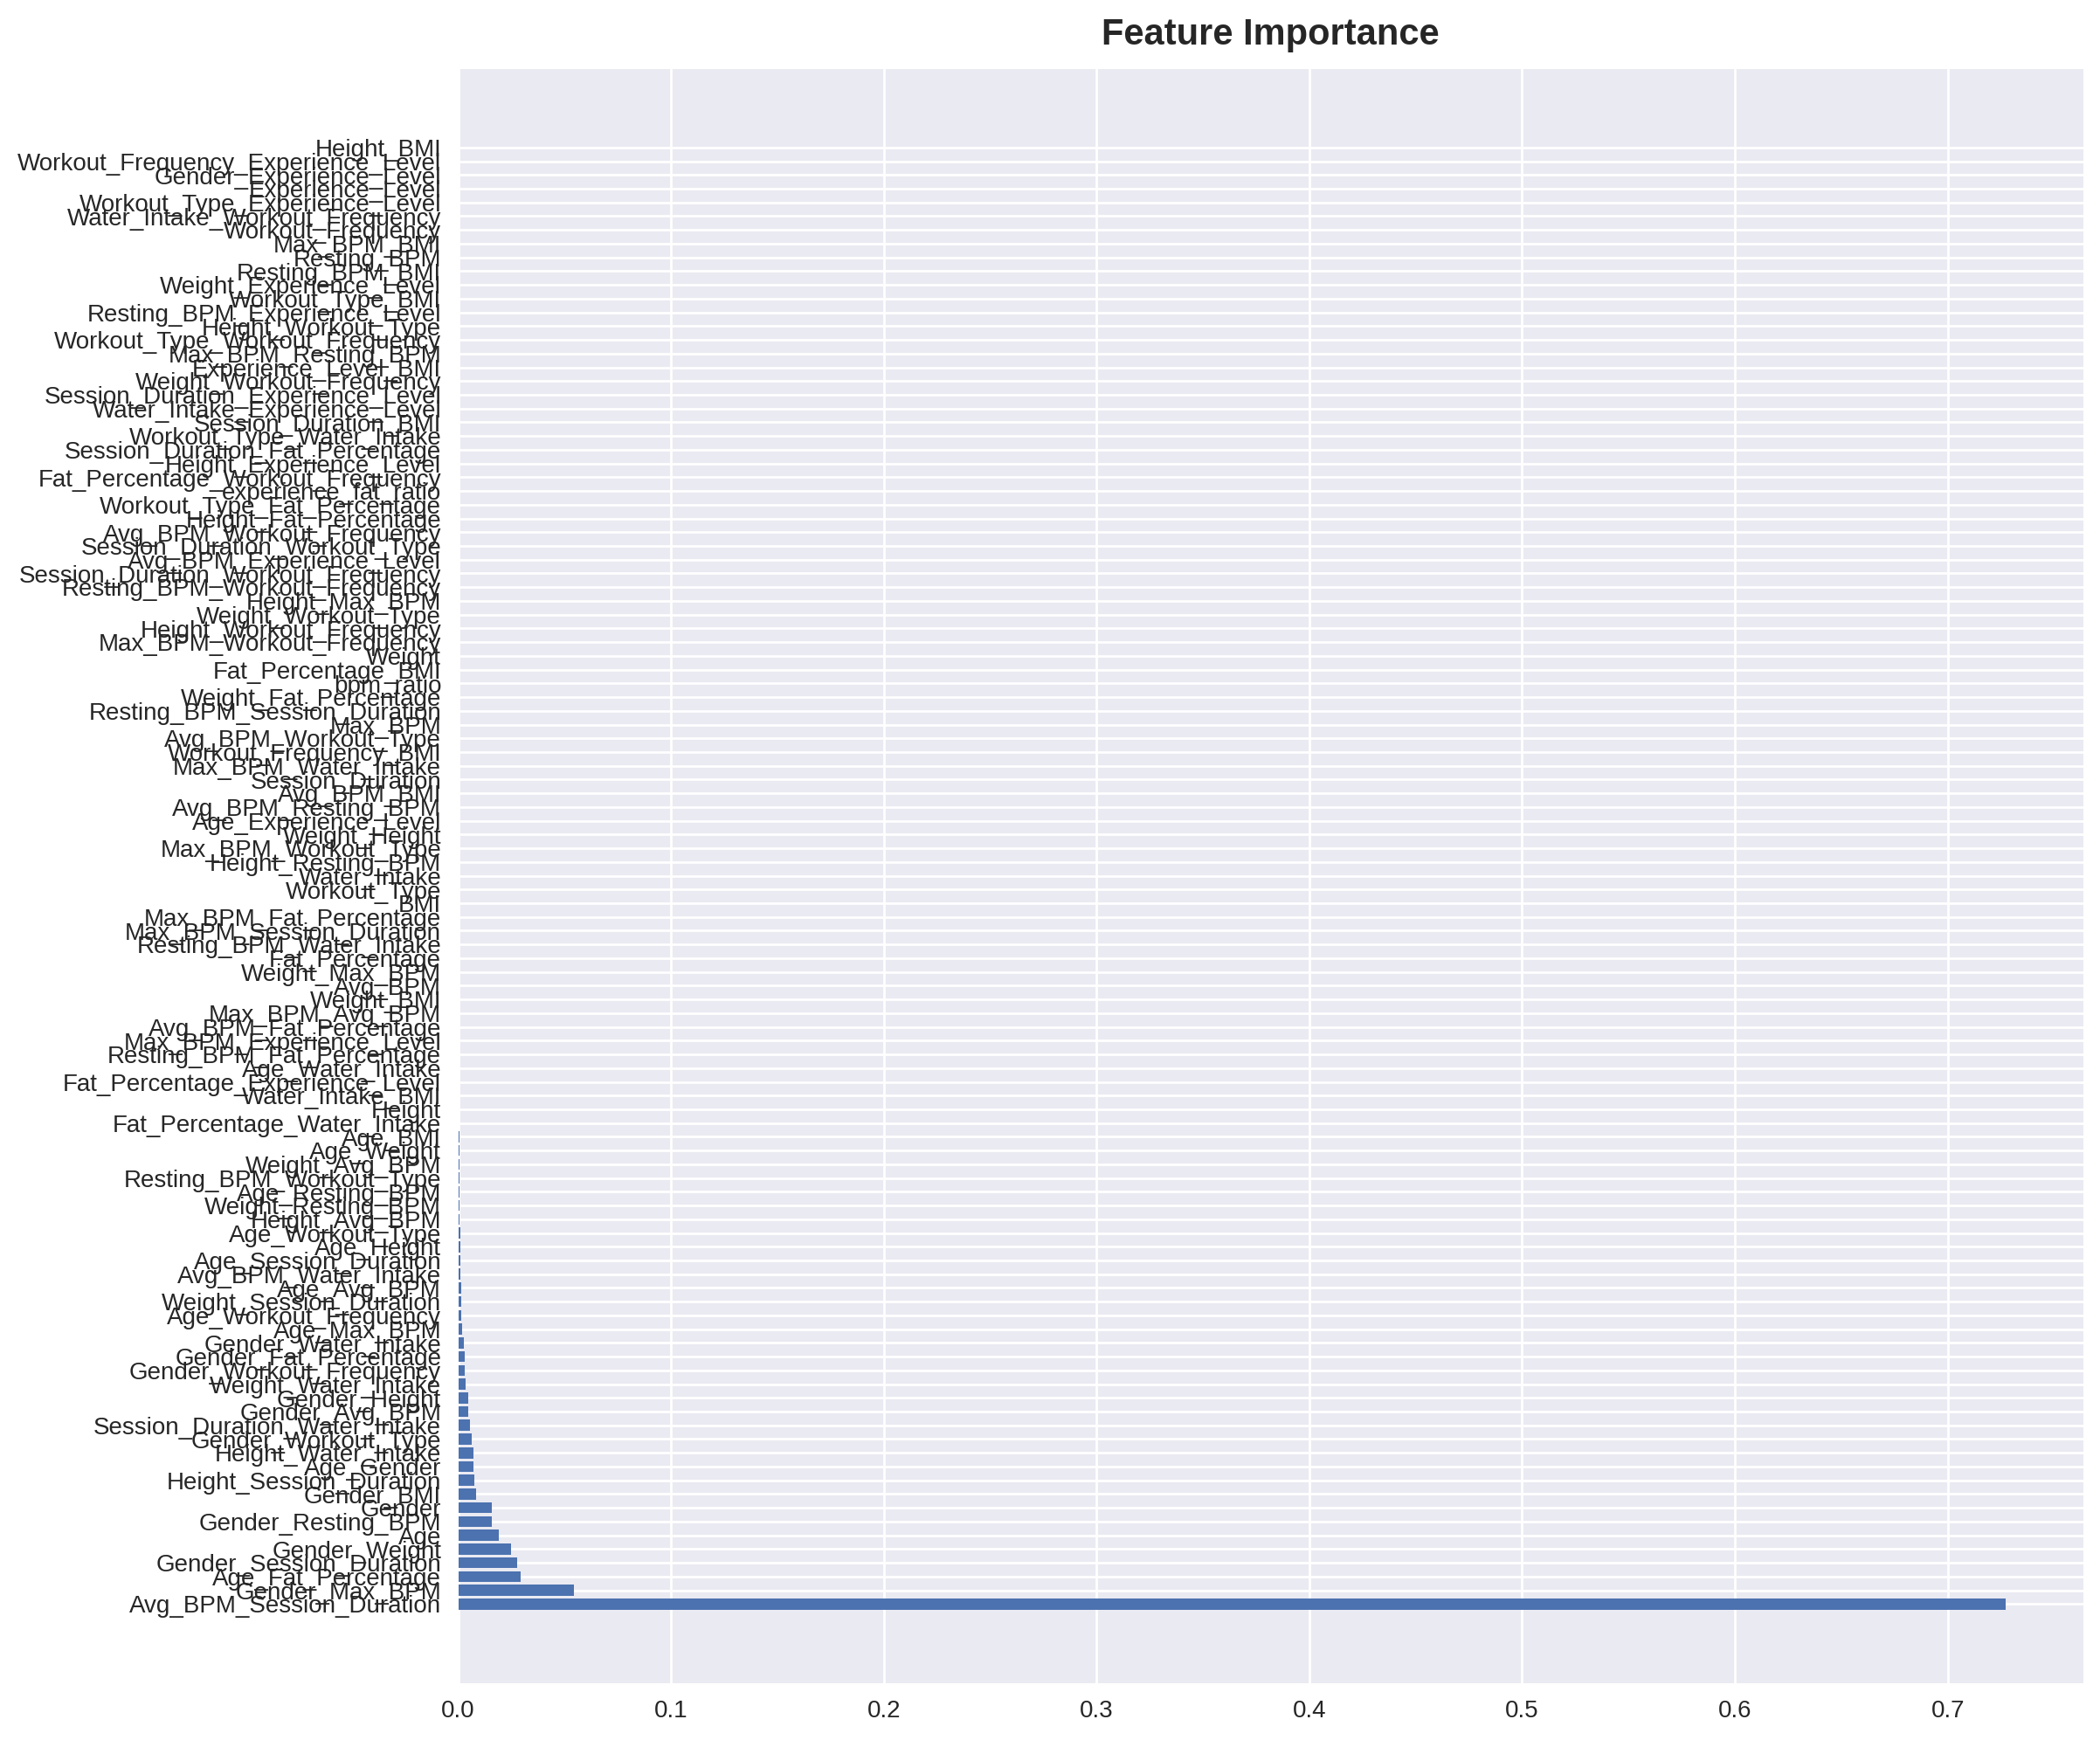

In [32]:
importances = xgb.feature_importances_
columns = X.columns

df_importances = pd.DataFrame({'Feature': columns, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 12))
plt.barh(df_importances['Feature'], df_importances['Importance'])
plt.title('Feature Importance')
plt.show

In [33]:
threshold = np.quantile(importances, 0.7)
selected_features = columns[importances > threshold]
top_X = X[selected_features]
print(selected_features)

Index(['Age', 'Gender', 'Age_Gender', 'Age_Height', 'Age_Max_BPM',
       'Age_Avg_BPM', 'Age_Resting_BPM', 'Age_Session_Duration',
       'Age_Workout_Type', 'Age_Fat_Percentage', 'Age_Workout_Frequency',
       'Gender_Weight', 'Gender_Height', 'Gender_Max_BPM', 'Gender_Avg_BPM',
       'Gender_Resting_BPM', 'Gender_Session_Duration', 'Gender_Workout_Type',
       'Gender_Fat_Percentage', 'Gender_Water_Intake',
       'Gender_Workout_Frequency', 'Gender_BMI', 'Weight_Resting_BPM',
       'Weight_Session_Duration', 'Weight_Water_Intake', 'Height_Avg_BPM',
       'Height_Session_Duration', 'Height_Water_Intake',
       'Avg_BPM_Session_Duration', 'Avg_BPM_Water_Intake',
       'Resting_BPM_Workout_Type', 'Session_Duration_Water_Intake'],
      dtype='object')


## CV score for top features

In [34]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(xgb, top_X, y, cv=kf, scoring='neg_root_mean_squared_error').mean()
scores_r2 = cross_val_score(xgb, top_X, y, cv=kf, scoring='r2').mean()
print(f'CV score for RMSE: {scores:.5f}')
print(f'CV score for R2Score: {scores_r2:.5f}')

CV score for RMSE: 0.01859
CV score for R2Score: 0.99661


# DNN

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers 
from tensorflow.keras.regularizers import l1, l2, l1_l2

input_shape = (X_train.shape[1], )

dnn = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(180, activation='relu', kernel_regularizer=l2(0.05)),
    layers.BatchNormalization(),
    layers.GaussianDropout(rate=0.3),
    layers.Dense(100, activation='leaky_relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    layers.Dense(60, activation='relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.GaussianDropout(rate=0.3),
    layers.Dense(1), 
])

dnn.compile(
    optimizer='adam',
    loss='mse'
)

early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=30,
    restore_best_weights=True,
)

history = dnn.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=20,
    epochs=150,
    callbacks=[early_stopping],
    verbose=1,
)


2025-04-18 05:21:50.823281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744953711.023879      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744953711.083153      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/150


2025-04-18 05:22:03.152415: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 54.7796 - val_loss: 48.0261
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.5916 - val_loss: 43.6375
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.6558 - val_loss: 37.5859
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.5247 - val_loss: 30.0447
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.4633 - val_loss: 21.4926
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.0108 - val_loss: 15.7301
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5892 - val_loss: 11.5279
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0622 - val_loss: 9.6433
Epoch 9/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7990 - val_loss: 8.4168
Epoch 10/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8237 - val_loss: 7.7057
Epoch 11/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0580 - val_loss: 7.4107
Epoch 12/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

Min Val Loss: 0.06398


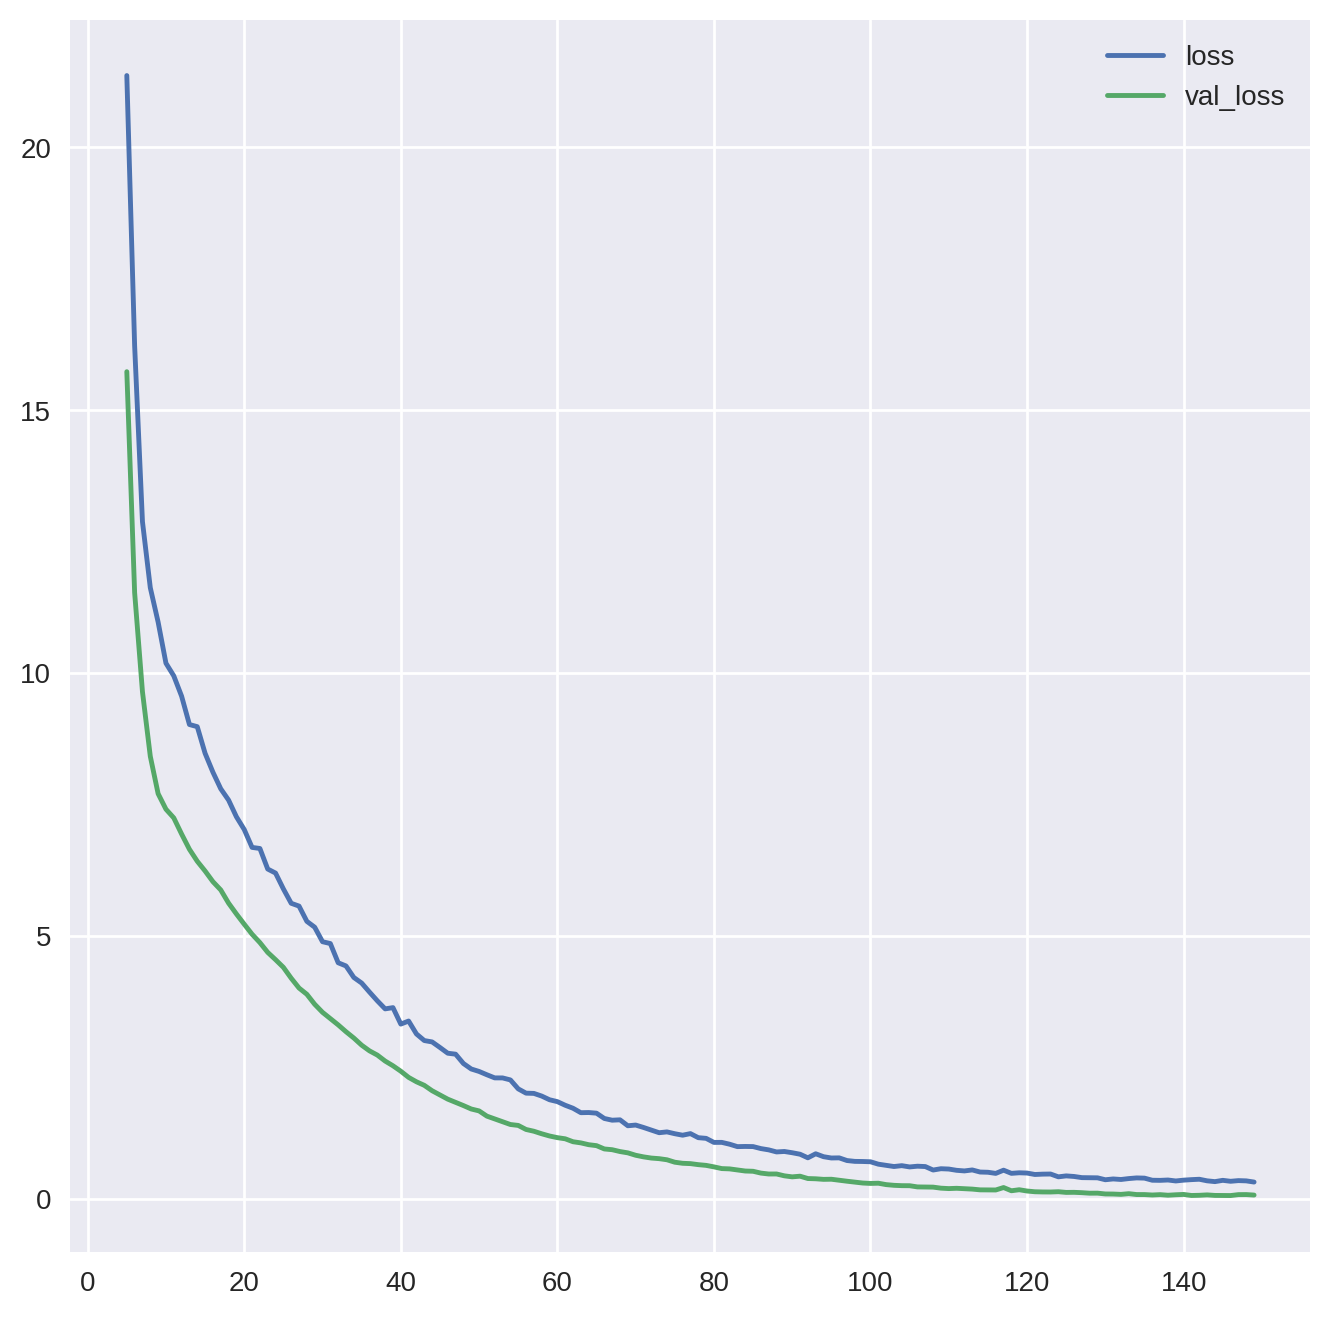

In [36]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
print("Min Val Loss: {:0.5f}".format(history_df['val_loss'].min()))